In [1]:
import sys
sys.path.append('/home/yja6qa/arepo_package/')
import arepo_package
import scipy.interpolate
radiative_efficiency=0.2
import h5py
%pylab inline
import os
import numpy as np
from brahma_analysis import *

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs

outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_ratio10_SFMFGM5_seed5.00_bFOF/',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

Property1 = 'GroupMassType'
Property2 = 'GroupBHMass'
redshifts = [5,0]
part=4
Prop1list,Prop2list,outputz_list,limits = load_data(path_to_output,run,outputlist,redshifts,Property1,Property2,part_type=part)

In [3]:
AllBoxMeans,AllBoxStdDevs,Xpoints = mean_trends(Prop1list,Prop2list,redshifts,limits,bins=8)

/sfs/qumulo/qhome/yja6qa/arepo_package/brahma_analysis.py:168: RuntimeWarning: divide by zero encountered in log10
  ids = np.where(np.logical_and(np.log10(Prop1list[i][ii])>=bins[iii],
/sfs/qumulo/qhome/yja6qa/arepo_package/brahma_analysis.py:169: RuntimeWarning: divide by zero encountered in log10
  np.log10(Prop1list[i][ii])<=bins[iii+1]))[0]
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/software/standard/core/ju

(<Figure size 1500x500 with 2 Axes>,
 array([<Axes: title={'center': 'Z=5'}>, <Axes: title={'center': 'Z=0'}>],
       dtype=object))

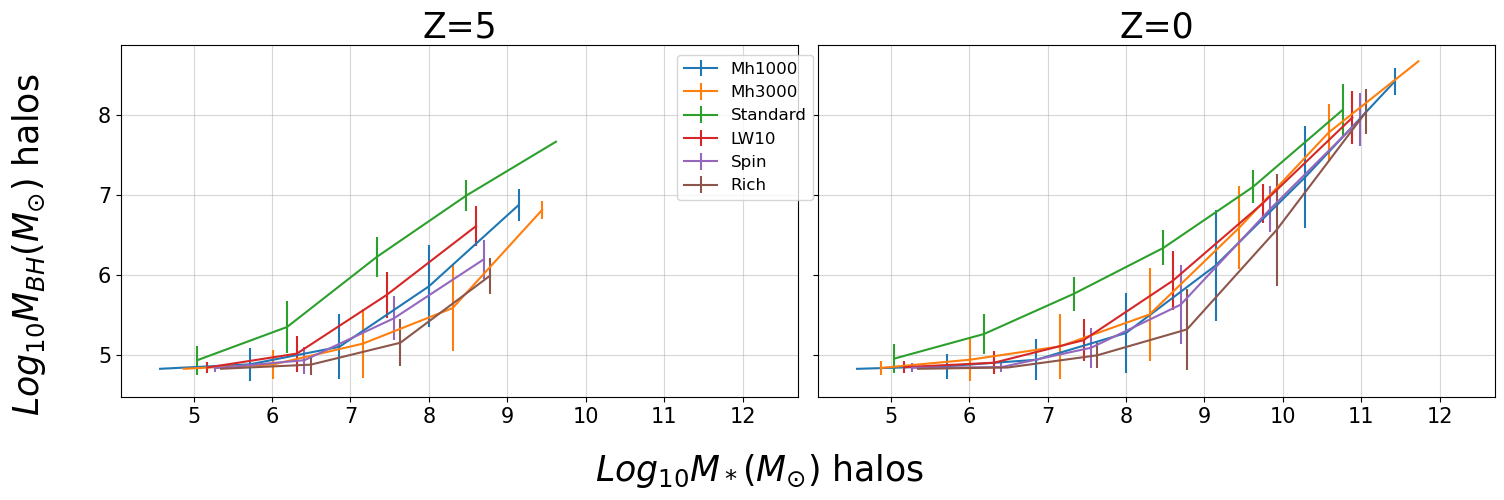

In [4]:
legend_names = ['Mh1000','Mh3000','Standard','LW10','Spin','Rich']
axislabels = ['$Log_{10}M_* (M_{\odot})$ halos','$Log_{10}M_{BH} (M_{\odot})$ halos']

plot_brahma(AllBoxMeans,AllBoxStdDevs,Xpoints,redshifts,legend_names,axislabels,savefig = False)

# Now: Stellar Mass vs BH Accretion Rate

In [5]:
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs

outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_ratio10_SFMFGM5_seed5.00_bFOF/',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

Property1 = 'GroupMassType'
Property2 = 'GroupBHMdot'
redshifts = [5,0]
part_type=4

# (1e10 Msun/h)/(0.978Gyr/h)
conversion2 = 1e10/0.978
SMlist,BH_Mdotlist,outputz_list,limits = load_data(path_to_output,run,outputlist,redshifts,Property1,Property2,part_type,conversion2=conversion2)


In [6]:
MDotMeans,MdotStdDevs,MdotXpoints = mean_trends(SMlist,BH_Mdotlist,redshifts,limits,bins=8)

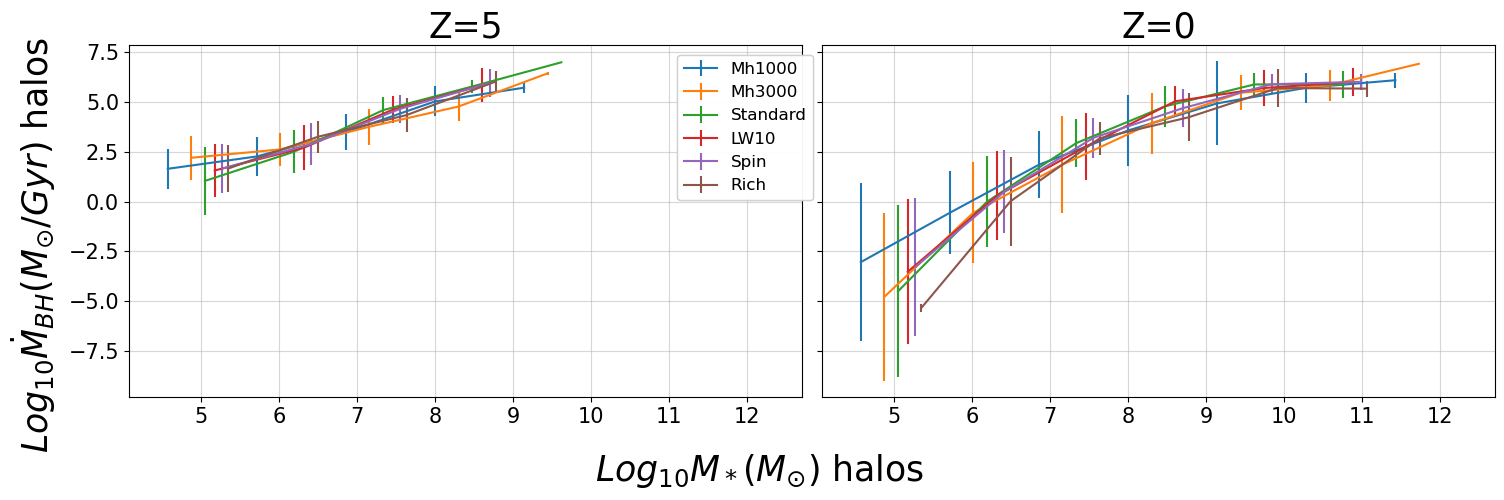

In [7]:
legend_names = ['Mh1000','Mh3000','Standard','LW10','Spin','Rich']
axislabels = ['$Log_{10}M_* (M_{\odot})$ halos','$Log_{10}\dot{M}_{BH} (M_{\odot}/Gyr)$ halos']

f,axes = plot_brahma(MDotMeans,MdotStdDevs,MdotXpoints,redshifts,legend_names,axislabels,savefig = 'BHMdot_Mstars.png')
f.legend(loc = (0.45,0.6),fontsize = 12)

## Converting Mdot to L

From https://ui.adsabs.harvard.edu/abs/2024MNRAS.529.3768B/abstract:

Accreting black holes radiate at bolometric luminosities given by

$L_{bol} = \epsilon_r * \dot{M}_{BH} * c^2$

where $\epsilon_r = 0.2$ is the radiative efficiency.

In [8]:
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs

outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_ratio10_SFMFGM5_seed5.00_bFOF/',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

Property1 = 'GroupMassType'
Property2 = 'GroupBHMdot'
redshifts = [5,0]
part_type=4

# (1e10 Msun/h)/(0.978Gyr/h)
conversion2 = 1e10/0.978
SMlist,Lbollist,outputz_list,limits = load_data(path_to_output,run,outputlist,redshifts,Property1,Property2,
                                                     part_type,conversion2=conversion2,Lbol=[False,True])


In [9]:
LbolMeans,LbolStdDevs,LbolXpoints = mean_trends(SMlist,Lbollist,redshifts,limits,bins=8)

/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


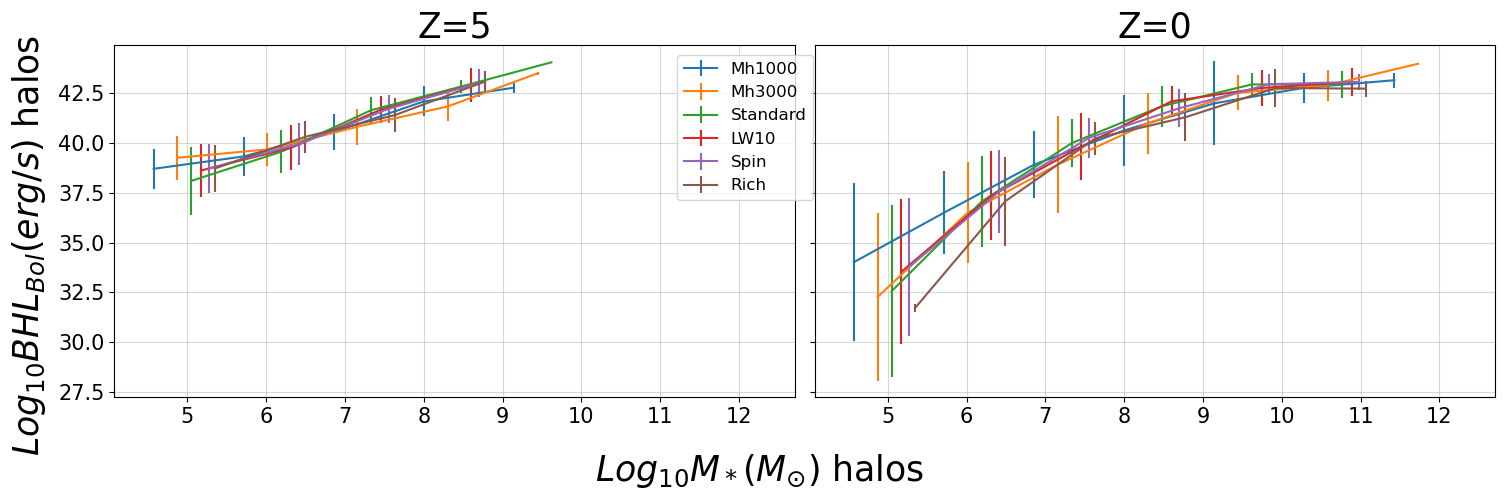

In [10]:
legend_names = ['Mh1000','Mh3000','Standard','LW10','Spin','Rich']
axislabels = ['$Log_{10}M_* (M_{\odot})$ halos','$Log_{10}BH L_{Bol} (erg/s)$ halos']

f,axes = plot_brahma(LbolMeans,LbolStdDevs,LbolXpoints,redshifts,legend_names,axislabels,savefig = 'BH_LBol_Mstars.png')


# Now, BH Mass vs BH Accretion Rate

In [11]:
path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs

outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_ratio10_SFMFGM5_seed5.00_bFOF/',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

Property1 = 'GroupMassType'
Property2 = 'GroupBHMdot'
redshifts = [5,0]
part_type=5 # We want BH mass now

# (1e10 Msun/h)/(0.978Gyr/h)
conversion2 = 1e10/0.978
BHMlist,BH_Mdotlist,outputz_list,limits = load_data(path_to_output,run,outputlist,redshifts,Property1,Property2,part_type,conversion2=conversion2)


In [12]:
BHMMeans,MdotStdDevs,MdotXpoints = mean_trends(BHMlist,BH_Mdotlist,redshifts,limits,bins=8)

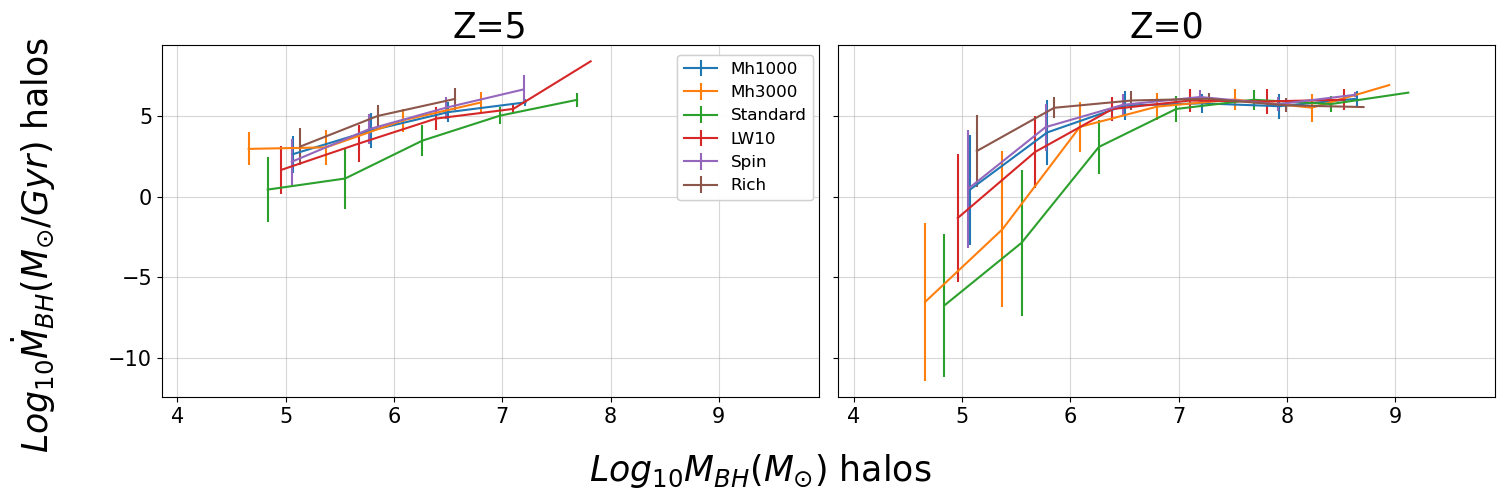

In [13]:
legend_names = ['Mh1000','Mh3000','Standard','LW10','Spin','Rich']
axislabels = ['$Log_{10}M_{BH} (M_{\odot})$ halos','$Log_{10}\dot{M}_{BH} (M_{\odot}/Gyr)$ halos']

f,axes = plot_brahma(BHMMeans,MdotStdDevs,MdotXpoints,redshifts,legend_names,axislabels,savefig = 'BHMdot_MBH.png')
f.legend(loc = (0.45,0.6),fontsize = 12)

# Getting Particle Properties

List of fields for particles:

['count', 'BirthDensity', 'BirthPos', 'BirthVel', 'Coordinates', 'GFM_InitialMass', 'GFM_Metallicity', 'GFM_Metals', 'GFM_MetalsTagged', 'GFM_StellarFormationTime', 'GFM_StellarPhotometrics','HostHaloMass', 'IsThisTheMinPotential', 'Masses', 'Parent_GasID', 'ParticleIDs', 'Potential', 'SeedMass', 'Spawned','StellarAgeGyr','SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities', 'no_of_BHs_ngb']

In [6]:
### See arepo_package line 271

path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs

outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_ratio10_SFMFGM5_seed5.00_bFOF/',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

output_path = path_to_output + run + outputlist[2]
particle_property = None # Should grab all fields, see snapshot.py line 213
p_type = 4 # Stars
desired_redshift = 5

particles, redshifts = arepo_package.get_particle_property(output_path,particle_property,p_type,desired_redshift)


Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  20


In [10]:
list(particles.keys())

['count',
 'BirthDensity',
 'BirthPos',
 'BirthVel',
 'Coordinates',
 'GFM_InitialMass',
 'GFM_Metallicity',
 'GFM_Metals',
 'GFM_MetalsTagged',
 'GFM_StellarFormationTime',
 'GFM_StellarPhotometrics',
 'HostHaloMass',
 'IsThisTheMinPotential',
 'Masses',
 'Parent_GasID',
 'ParticleIDs',
 'Potential',
 'SeedMass',
 'Spawned',
 'StellarAgeGyr',
 'SubfindDMDensity',
 'SubfindDensity',
 'SubfindHsml',
 'SubfindVelDisp',
 'Velocities',
 'no_of_BHs_ngb']

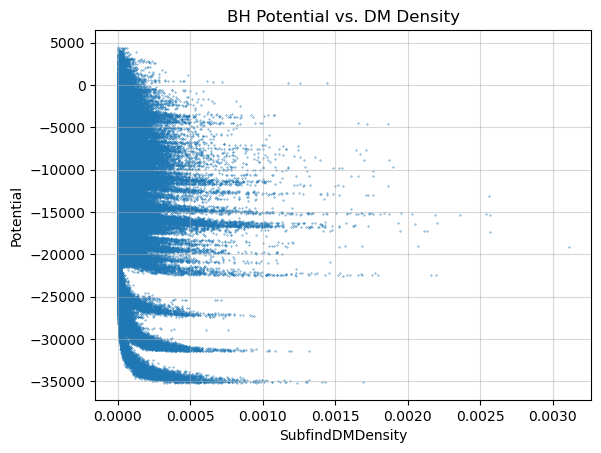

In [27]:
plt.scatter(particles['SubfindDMDensity'],particles['Potential'],s = 0.1)
plt.xlabel('SubfindDMDensity')
plt.ylabel('Potential')
plt.title('BH Potential vs. DM Density')
plt.grid(alpha = 0.5)
plt.savefig('BH_particle_img.png')

## BH Mass vs # Progenitors

In [23]:
### See arepo_package line 271

path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs

outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_ratio10_SFMFGM5_seed5.00_bFOF/',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

output_path = path_to_output + run + outputlist[2]
particle_property = None # Should grab all fields, see snapshot.py line 213
p_type = 5 # BHs
desired_redshift1 = 5
desired_redshift2 = 0

particles, redshifts = arepo_package.get_particle_property(output_path,particle_property,p_type,desired_redshift1)
particles2, redshifts = arepo_package.get_particle_property(output_path,particle_property,p_type,desired_redshift2)

Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  20
Desired redshift:  0
Output redshift:  2.220446049250313e-16
Output snapshot:  32


In [3]:
list(particles.keys())

['count',
 'BH_BPressure',
 'BH_CumEgyInjection_QM',
 'BH_CumEgyInjection_RM',
 'BH_CumMassGrowth_QM',
 'BH_CumMassGrowth_RM',
 'BH_Density',
 'BH_HostHaloMass',
 'BH_Hsml',
 'BH_MPB_CumEgyHigh',
 'BH_MPB_CumEgyLow',
 'BH_Mass',
 'BH_Mdot',
 'BH_MdotBondi',
 'BH_MdotEddington',
 'BH_Pressure',
 'BH_Progs',
 'BH_U',
 'Coordinates',
 'HostHaloMass',
 'IsThisTheMinPotential',
 'Masses',
 'NeighborsHaveBeenPainted',
 'ParticleIDs',
 'Potential',
 'SubfindDMDensity',
 'SubfindDensity',
 'SubfindHsml',
 'SubfindVelDisp',
 'Time_Of_Seeding',
 'Velocities',
 'no_of_BHs_ngb']

In [28]:
BH_Mass1 = particles['BH_Mass']*1e10*0.6774
BH_Mass2 = particles2['BH_Mass']*1e10*0.6774

N_Prog1 = particles['BH_Progs']
N_Prog2 = particles2['BH_Progs']

BH_Mass_from_Mergers1 = (particles['BH_Mass']-particles['BH_CumMassGrowth_QM']-particles['BH_CumMassGrowth_RM'])*1e10*0.6774
BH_Mass_from_Mergers2 = (particles2['BH_Mass']-particles2['BH_CumMassGrowth_QM']-particles2['BH_CumMassGrowth_RM'])*1e10*0.6774

Merger_Frac1 = BH_Mass_from_Mergers1/BH_Mass1
Merger_Frac2 = BH_Mass_from_Mergers2/BH_Mass2


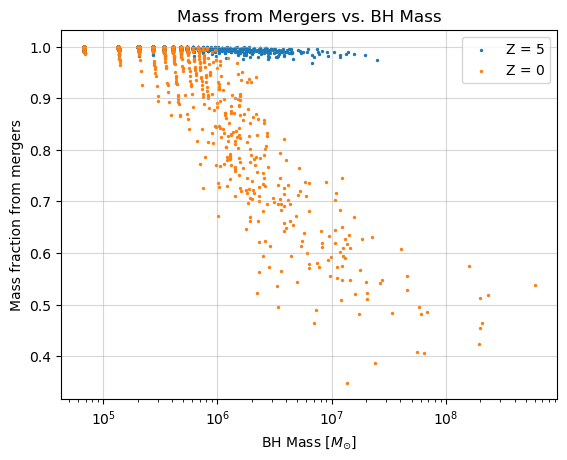

In [35]:
f,ax = plt.subplots(1,1)
ax.scatter(BH_Mass1,Merger_Frac1,s = 2,label = 'Z = 5')
ax.scatter(BH_Mass2,Merger_Frac2,s = 2,label = 'Z = 0')
ax.set_xscale('log')
ax.set_xlabel('BH Mass $[M_{\odot}]$')
ax.set_ylabel('Mass fraction from mergers')
ax.set(title='Mass from Mergers vs. BH Mass')
ax.grid(alpha = 0.5)
ax.legend()
plt.savefig('Merger_Mass_vs_BH_Mass.png')

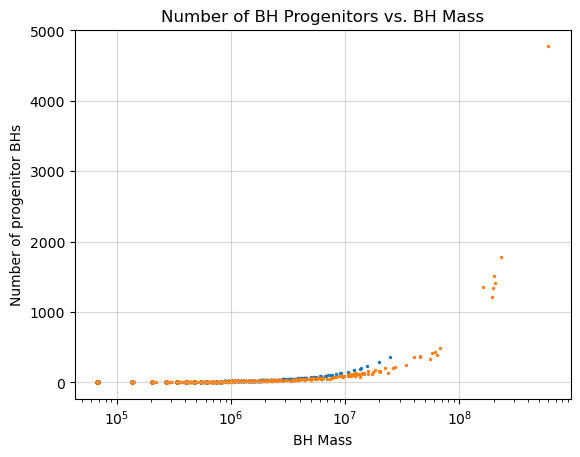

In [25]:
f,ax = plt.subplots(1,1)
ax.scatter(BH_Mass1,N_Prog1,s = 2,label = 'Z = 5')
ax.scatter(BH_Mass2,N_Prog2,s = 2,label = 'Z = 0')
ax.set_xscale('log')
ax.set_xlabel('BH Mass')
ax.set_ylabel('Number of progenitor BHs')
ax.set(title='Number of BH Progenitors vs. BH Mass')
ax.grid(alpha = 0.5)
plt.savefig('N_Progenitors_vs_BH_Mass.png')

## Gas particle data

In [2]:
### See arepo_package line 271

path_to_output='/standard/torrey-group/BRAHMA/L12p5n512' # this is the folder containing the simulation run
run='/AREPO/' # name of the simulation runs

outputlist=['output_Msfmp5_Mh1000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_Msfmp5_Mh3000_double_powerlaw_env_5_0.1_0.3_slope1.6',
            'output_ratio10_SFMFGM5_seed5.00_bFOF/',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin',
            'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich']

output_path = path_to_output + run + outputlist[2]
particle_property = None # Should grab all fields, see snapshot.py line 213
p_type = 1 # Gas
desired_redshift = 5

# This causes my kernel to die when using 1 core; runs properly with 6 cores
particles, redshifts = arepo_package.get_particle_property(output_path,particle_property,p_type,desired_redshift)


Desired redshift:  5
Output redshift:  4.995933468164624
Output snapshot:  20


In [3]:
list(particles.keys())

['count',
 'Coordinates',
 'HostHaloMass',
 'IsThisTheMinPotential',
 'ParticleIDs',
 'Potential',
 'SubfindDMDensity',
 'SubfindDensity',
 'SubfindHsml',
 'SubfindVelDisp',
 'Velocities',
 'no_of_BHs_ngb']

In [4]:
len(particles['SubfindDMDensity'])

134217728

In [5]:
len(particles['SubfindVelDisp'])

134217728

In [ ]:
# plt.scatter(particles['SubfindDMDensity'],particles['SubfindVelDisp'],s = 1)